---
author: "Yifei Wu"
format: 
  html:s
    include-in-header: HS.html
    toc: true
    code-fold: true
    code-tools: true
    number-sections: true
    fig-align : center
    fontsize : large
    mainfont: Source Sans Pro, Helvetica Neue, Helvetica, Arial, sans-serif;
---

# Introduction

In this tab, we tried to build a distinguisher that used to distinguish the  Tweets the user sent about the FIFA WorldCup which is official and unofficial and the model called SVM(Supported Vector Machine) will be used. 

# Theory

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

When data are unlabelled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The support vector clustering algorithm, created by Hava Siegelmann and Vladimir Vapnik, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data.

More formally, a support vector machine constructs a hyperplane or set of hyperplanes in a high or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.[3] Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier

# Read Data

In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


In [4]:
#Read the data
df=pd.read_csv("../../data/01-modified-data/WC cleaneddata.csv")
df

,created_at,author_id,Tweet Point,Follows,Likes,text,keyword,label,unofficial,retweet_count
0,2022-09-13T23:58:10.000Z,1.447698e+18,-0.2960,1324.0,594.0,Dr alhammadi 22 They are also the graves of th...,qatar2022,1.0,0.0,0
1,2022-09-13T23:31:59.000Z,2.986481e+09,-0.4515,697325.0,2907.0,DolapoAina FIFAWorldCup qatarairways aviati...,qatar2022,1.0,0.0,65
2,2022-09-13T23:20:24.000Z,3.133369e+09,0.0000,465.0,177.0,If anyone knows anyone going to Qatar for the ...,qatar2022,1.0,0.0,32
3,2022-09-13T23:08:07.000Z,4.701157e+09,0.0000,334.0,1524.0,67 DAYS TO GO Qatar2022 FIFAWorldCup Co...,qatar2022,1.0,0.0,0
4,2022-09-13T23:07:02.000Z,1.529608e+18,0.8475,760.0,1264.0,AlSultanBeach Here is a map I made for World C...,qatar2022,1.0,0.0,176
...,...,...,...,...,...,...,...,...,...,...
7083,2022-09-14T17:19:30.000Z,1.559664e+18,0.6697,188.0,38.0,malzamaty For daily rent During the World Cup ...,qatar world cup,0.0,1.0,3
7084,2022-09-14T17:19:15.000Z,1.559664e+18,0.6697,1735.0,989.0,WWE nikkita wwe For daily rent During the Wor...,qatar world cup,0.0,1.0,0
7085,2022-09-14T17:18:59.000Z,1.382067e+18,0.9545,82.0,843.0,I have won a Gold medal by playing Qatar Airwa...,qatar world cup,0.0,1.0,252
7086,2022-09-14T17:18:56.000Z,1.559664e+18,0.6697,911.0,1547.0,SportsCenter For daily rent During the World C...,qatar world cup,0.0,1.0,0


# Class Distibution

Text(0, 0.5, 'Count')

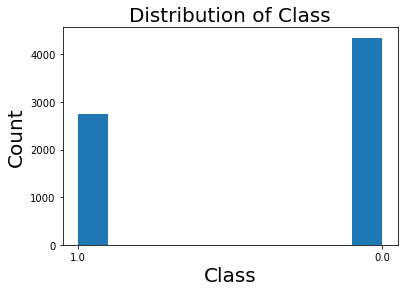

In [5]:
#Make a plot for the distribution
FS=20
plt.hist(df.label.astype('string'))
plt.title('Distribution of Class',fontsize=FS)
plt.xlabel('Class',fontsize=FS)
plt.ylabel('Count',fontsize=FS)

This data set is a bit imbalanced.Which seperate the official and the unofficial accounts, as the official accounts is less than the unofficial, so it's hard to find the balanced dataset. Maybe the final results would reflect this point.

# Baseline Model for Comparsion

In [21]:
y=df["label"]
y=y.astype("int")
# Make a Baseline Model 
def random_classifier(y_data):
    ypred=[]
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))
    print("-----RANDOM CLASSIFIER-----")
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data,ypred))

random_classifier(y)

-----RANDOM CLASSIFIER-----
accuracy 0.5063487584650113
percision, recall, fscore, (array([0.6198254 , 0.39242296]), array([0.50597701, 0.50693937]), array([0.55714467, 0.44239044]), array([4350, 2738]))


According to the data we can the metric is around 50%, if the model peform better than this, than it's bettter.

# Feature Selection

In [5]:

X=df["text"]
y=df['label']
y=y.astype("int")
#transform texts with countvectorizer
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(X)
X = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out())
#split the data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



# Final result: Confusion & Tree model

ACCURACY: 0.9795486600846263
NEGATIVE RECALL (Y=0): 0.978865406006674
NEGATIVE PRECISION (Y=0): 0.9887640449438202
POSITIVE RECALL (Y=1): 0.9807321772639692
POSITIVE PRECISION (Y=1): 0.9640151515151515



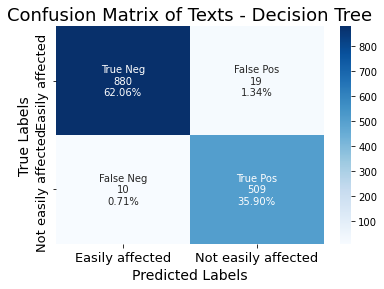

In [6]:
#write a function to report and plot the metrics and confusion matrix.
def confusion_plot(y_data,y_pred):
    print(
        "ACCURACY: "+str(accuracy_score(y_data,y_pred))+"\n"+
        "NEGATIVE RECALL (Y=0): "+str(recall_score(y_data,y_pred,pos_label=0))+"\n"+
        "NEGATIVE PRECISION (Y=0): "+str(precision_score(y_data,y_pred,pos_label=0))+"\n"+
        "POSITIVE RECALL (Y=1): "+str(recall_score(y_data,y_pred,pos_label=1))+"\n"+
        "POSITIVE PRECISION (Y=1): "+str(precision_score(y_data,y_pred,pos_label=1))+"\n"
    )
    cf=confusion_matrix(y_data, y_pred)
    # customize the anno
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #plot the heatmap
    fig=sns.heatmap(cf, annot=labels, fmt="", cmap='Blues')
    plt.title("Confusion Matrix of Texts - Decision Tree",fontsize=18)
    fig.set_xticklabels(["Easily affected","Not easily affected"],fontsize=13)
    fig.set_yticklabels(["Easily affected","Not easily affected"],fontsize=13)
    fig.set_xlabel("Predicted Labels",fontsize=14)
    fig.set_ylabel("True Labels",fontsize=14)
    plt.show()
#fit the model with the best hyperparametres
clf=SVC(C=1,kernel="linear")
clf.fit(x_train,y_train)
yp_test=clf.predict(x_test)
confusion_plot(y_test,yp_test)

# Conclusion

It shows that SVM  model is not suitable for my topic,it seems much worse than decision tree model when facing the same task. I think that I still need to stratch more information to achieve the target.